# Cluster Analysis

### Introduction

+ Clustering is a process of grouping a set of data objects into multiple groups or clusters so that objects within a cluster have high similarity, but are very dissimilar to objects in other clusters. 
+ There are a lot of areas to apply cluster analysis, such as collaborative filtering, outlier detection, and dynamic trend detection. 
+ In this exercise, we will practice with topic clustering. In other words, we will group documents by topic to support navigation and exploration.
+ If you have not done yet, please review the text vectorization exercise: http://keensee.com/pdp/demo/python_text_vector.html.

In this exercise, we are going to utilize a dataset distributed as a part of the Yelp Dataset Challenge (https://www.yelp.com/dataset). This is the same dataset you used for the data preprocessing and assignment 2. The previous dataset had attributes processed from text, while it did not include text. In this exercise, you would directly process text. Let's open the data. There are 1,000 tuples and 4 attributes. The names of attributes are self-explanatory: review_id, text, categories, and class. You are going to work with the text attribute.


In [72]:
## Imports all necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk, re

# Sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from pprint import pprint

## This loads the csv file from disk
yelp_data = pd.read_csv(
    filepath_or_buffer = "yelp_reviews.csv", sep = ",", header=0 )

print(yelp_data.head(20))
## print the dimension of the data
print(yelp_data.shape)

                 review_id                                               text  \
0   DsSDS62dKyo7XUQCI6OcFg  Came into Vegas late Sunday night, I was very ...   
1   8VsHoYKyId2qBwPqU7Qxbg  So far, this is the best place I've found in P...   
2   Y9uwvKtfgZFk2WA78qSQvQ  After spending time in Germany in the military...   
3   E-3oHcwjLOMyj2Ui0zgHAg  I love this place.  It's far from my home, but...   
4   rqI96uynSJaZxMKnhaRg7A  I love this place for their lunch items, which...   
5   k9Coyr7Sxz4BrINd6zJYjg  The Shave Ice here is almost as good as being ...   
6   v0GE3-1YQhBubkHAtao3UA  I am a big Paul Frank fan!! I live really clos...   
7   KPMAt1OtKKC1eY2zhH_Mcw  This place has great food and the best prices ...   
8   YuatdmTpwSjym3GwUtSaPA  I can only give this place an OK because that'...   
9   KU--WdrpcCPdOo4k4qMXLQ  So I have been in search of a place to watch F...   
10  XZRQgX-lIREMgL9kyCkhqw  One of my favorite stores.  Very lovely garden...   
11  B1A18MXoGb1ub21PYshGBg  

### Text vectorization

You loaded the data. Now, you need to vectorize text so that they can be used for clustering. Before vectorization, you have to preprocess text, including tokenization, stopwords removal, and stemming.

In [73]:
# Convert text to a list of data
data = yelp_data.text.values.tolist()

# Created a list of ids
ids =yelp_data.review_id.values.tolist()

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

pprint(data[:5])

['Came into Vegas late Sunday night, I was very tired and hungry and ready to '
 'grub. I went to the Bellagio buffet around 10pm and the line moved quickly. '
 "I've eaten here before and I remember it being so good, but not that good "
 'this time. it took a long time to walk there from the parking lot. Also, the '
 'crab legs were so salty and the meat was covered in ice. The salmon hor '
 "d'oeurves were great but that was the only thing. The mini salads were too "
 'drenched in dressing. The Mediterranean apps seemed stale. The prime rib was '
 'soo salty! The desserts were very plain.',
 "So far, this is the best place I've found in Phoenix (been here 5 weeks on "
 "business, eating out most nights). This place is the closest I've come to "
 "finding a 'family run, no frills' restaurant similar to what Im used to in "
 "the Bay Area (if there's one thing I'm tired of, it's the 'over-fancy' "
 "places in Scottsdale - let's focus on food, folks, not winning an "
 'architectural des

In [74]:
## Conduct text preprocessing such as tokenization, stopwords removal, and stemming.

from nltk.tokenize import word_tokenize

## tokenization
tokens = [word_tokenize(review) for review in data]

print(tokens[:5])

[['Came', 'into', 'Vegas', 'late', 'Sunday', 'night', ',', 'I', 'was', 'very', 'tired', 'and', 'hungry', 'and', 'ready', 'to', 'grub', '.', 'I', 'went', 'to', 'the', 'Bellagio', 'buffet', 'around', '10pm', 'and', 'the', 'line', 'moved', 'quickly', '.', 'I', "'ve", 'eaten', 'here', 'before', 'and', 'I', 'remember', 'it', 'being', 'so', 'good', ',', 'but', 'not', 'that', 'good', 'this', 'time', '.', 'it', 'took', 'a', 'long', 'time', 'to', 'walk', 'there', 'from', 'the', 'parking', 'lot', '.', 'Also', ',', 'the', 'crab', 'legs', 'were', 'so', 'salty', 'and', 'the', 'meat', 'was', 'covered', 'in', 'ice', '.', 'The', 'salmon', 'hor', "d'oeurves", 'were', 'great', 'but', 'that', 'was', 'the', 'only', 'thing', '.', 'The', 'mini', 'salads', 'were', 'too', 'drenched', 'in', 'dressing', '.', 'The', 'Mediterranean', 'apps', 'seemed', 'stale', '.', 'The', 'prime', 'rib', 'was', 'soo', 'salty', '!', 'The', 'desserts', 'were', 'very', 'plain', '.'], ['So', 'far', ',', 'this', 'is', 'the', 'best', '

In [75]:
## import NLTK stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

## following punctuations and contractions do not deliever any special meaning in text processing.
stop_words.extend(["!", ".", ",", "?", "'", "-", "(", ")", "'s", "'ve", "'m" ])

## remove stopwords
tokens_no_stopwords = [[word.replace("'","") for word in review if word not in stop_words] for review in tokens]

print(tokens_no_stopwords[:5])
    

[['Came', 'Vegas', 'late', 'Sunday', 'night', 'I', 'tired', 'hungry', 'ready', 'grub', 'I', 'went', 'Bellagio', 'buffet', 'around', '10pm', 'line', 'moved', 'quickly', 'I', 'eaten', 'I', 'remember', 'good', 'good', 'time', 'took', 'long', 'time', 'walk', 'parking', 'lot', 'Also', 'crab', 'legs', 'salty', 'meat', 'covered', 'ice', 'The', 'salmon', 'hor', 'doeurves', 'great', 'thing', 'The', 'mini', 'salads', 'drenched', 'dressing', 'The', 'Mediterranean', 'apps', 'seemed', 'stale', 'The', 'prime', 'rib', 'soo', 'salty', 'The', 'desserts', 'plain'], ['So', 'far', 'best', 'place', 'I', 'found', 'Phoenix', '5', 'weeks', 'business', 'eating', 'nights', 'This', 'place', 'closest', 'I', 'come', 'finding', 'family', 'run', 'frills', 'restaurant', 'similar', 'Im', 'used', 'Bay', 'Area', 'one', 'thing', 'I', 'tired', 'over-fancy', 'places', 'Scottsdale', 'let', 'focus', 'food', 'folks', 'winning', 'architectural', 'design', 'contest', 'The', 'veal', 'piccata', 'great', 'thin', 'tender', 'veal', 

In [77]:
## load nltk's SnowballStemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

## stemming and normalization by converting all characters to lower cases
tokens_stemmed = [[stemmer.stem(word) for word in review] for review in tokens_no_stopwords ]

print(tokens_stemmed[:5])


[['came', 'vega', 'late', 'sunday', 'night', 'i', 'tire', 'hungri', 'readi', 'grub', 'i', 'went', 'bellagio', 'buffet', 'around', '10pm', 'line', 'move', 'quick', 'i', 'eaten', 'i', 'rememb', 'good', 'good', 'time', 'took', 'long', 'time', 'walk', 'park', 'lot', 'also', 'crab', 'leg', 'salti', 'meat', 'cover', 'ice', 'the', 'salmon', 'hor', 'doeurv', 'great', 'thing', 'the', 'mini', 'salad', 'drench', 'dress', 'the', 'mediterranean', 'app', 'seem', 'stale', 'the', 'prime', 'rib', 'soo', 'salti', 'the', 'dessert', 'plain'], ['so', 'far', 'best', 'place', 'i', 'found', 'phoenix', '5', 'week', 'busi', 'eat', 'night', 'this', 'place', 'closest', 'i', 'come', 'find', 'famili', 'run', 'frill', 'restaur', 'similar', 'im', 'use', 'bay', 'area', 'one', 'thing', 'i', 'tire', 'over-f', 'place', 'scottsdal', 'let', 'focus', 'food', 'folk', 'win', 'architectur', 'design', 'contest', 'the', 'veal', 'piccata', 'great', 'thin', 'tender', 'veal', 'marsala', 'the', 'hous', 'made', 'sausag', 'also', 'tas

In [78]:
## concatenate tokens
## the input for vectorizer should be in the form of a list of string
tokens_concatenated = [" ".join(token) for token in tokens_stemmed]
print(tokens_concatenated[:5])

['came vega late sunday night i tire hungri readi grub i went bellagio buffet around 10pm line move quick i eaten i rememb good good time took long time walk park lot also crab leg salti meat cover ice the salmon hor doeurv great thing the mini salad drench dress the mediterranean app seem stale the prime rib soo salti the dessert plain', 'so far best place i found phoenix 5 week busi eat night this place closest i come find famili run frill restaur similar im use bay area one thing i tire over-f place scottsdal let focus food folk win architectur design contest the veal piccata great thin tender veal marsala the hous made sausag also tasti though bit salti the pita bread serv arriv perhap best i ever idea and salad great the cook veggi serv meal super-fresh anoth surpris the servic friend overbear nice see place independ own busi 15 year if could somehow move away rowdi drink hole next door life would even better it tad pricey side typic scottsdal', 'after spend time germani militari 

In [79]:
##define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(
                                    analyzer = 'word',
                                    max_df=0.8, 
                                    max_features=2000,
                                    min_df=0.05, 
                                    stop_words='english',
                                    use_idf=True, 
                                    ngram_range=(1,3),
                                    token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                                  )

tfidf_matrix = tfidf_vectorizer.fit_transform(tokens_concatenated)

print(tfidf_matrix.shape)

terms = tfidf_vectorizer.get_feature_names()

## print features you selected.
print(terms)

(1000, 227)
['actual', 'alway', 'amaz', 'anoth', 'anyth', 'appet', 'area', 'arriv', 'ask', 'atmospher', 'away', 'awesom', 'bad', 'bar', 'beauti', 'beef', 'beer', 'best', 'better', 'big', 'bit', 'bread', 'breakfast', 'buffet', 'burger', 'busi', 'came', 'casino', 'chang', 'check', 'chees', 'chicken', 'choic', 'clean', 'close', 'club', 'come', 'cook', 'cool', 'coupl', 'cours', 'cream', 'crowd', 'day', 'deal', 'decent', 'decid', 'decor', 'definit', 'delici', 'dessert', 'differ', 'dine', 'dinner', 'disappoint', 'dish', 'drink', 'eat', 'els', 'end', 'enjoy', 'especi', 'everi', 'everyon', 'everyth', 'excel', 'expect', 'experi', 'famili', 'far', 'favorit', 'feel', 'final', 'flavor', 'food', 'free', 'fresh', 'fri', 'friend', 'fun', 'gave', 'girl', 'good', 'got', 'great', 'group', 'guess', 'guy', 'half', 'hand', 'happi', 'hard', 'head', 'help', 'high', 'home', 'hot', 'hotel', 'hour', 'hous', 'howev', 'huge', 'ice', 'includ', 'insid', 'item', 'kind', 'know', 'larg', 'leav', 'left', 'let', 'light'

In [80]:
## it is useful to know what terms are included. But knowing the real tf-idf values will be more helpful
review_index = [n for n in ids]
import pandas as pd
df = pd.DataFrame(
tfidf_matrix.T.todense(), index=terms, columns=review_index)
print(df.transpose())

                        actual     alway      amaz     anoth  anyth  appet  \
DsSDS62dKyo7XUQCI6OcFg     0.0  0.000000  0.000000  0.000000    0.0    0.0   
8VsHoYKyId2qBwPqU7Qxbg     0.0  0.000000  0.000000  0.143453    0.0    0.0   
Y9uwvKtfgZFk2WA78qSQvQ     0.0  0.000000  0.000000  0.000000    0.0    0.0   
E-3oHcwjLOMyj2Ui0zgHAg     0.0  0.000000  0.000000  0.000000    0.0    0.0   
rqI96uynSJaZxMKnhaRg7A     0.0  0.000000  0.000000  0.000000    0.0    0.0   
...                        ...       ...       ...       ...    ...    ...   
IMBGY0-CHuGtQ737juwjtA     0.0  0.181796  0.000000  0.000000    0.0    0.0   
MwTAE-dbsDeMf6aLyquBLw     0.0  0.000000  0.000000  0.000000    0.0    0.0   
z6p0OHaIF5lb0f1AfNW5Fw     0.0  0.162011  0.000000  0.000000    0.0    0.0   
v41Vh9FYFqZVTpuvZRfqlQ     0.0  0.000000  0.000000  0.000000    0.0    0.0   
G_HqFFEXSvFe2QITLEK2wg     0.0  0.000000  0.424194  0.000000    0.0    0.0   

                            area     arriv       ask  atmospher

Great! You have applied text preprocessing and created a tf-idf term matrix so far. As you can see, there are a few parameters you can modify in the TfidfVectorizer, such as max_df and min_df. If a term occurs too much, then the term is not unique enough to deliver any information. These are terms such as stopwords. Also, if a term rarely occurs, then the term does not have enough evidence to prove to be discriminative. Therefore, changing these parameters would give you different tf-idf matrices. Especially, the number of terms will change. For details, please look at the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

### K-means clustering

Now, we are ready to move onto the next fun step, which is the actual clustering using K-means algorithm. Please note that you should specify the number of clusters (_k_) to the algorithm in advance. Also, this algorithm finds a local optimum instead of a global optimum. Therefore it is wise to run the k-means algorithm multiple times with different _k_. We will practice this in the later part.

In [81]:
from sklearn.cluster import KMeans

## specify K
num_clusters = 5

km_model = KMeans(n_clusters=num_clusters)

km_model.fit(tfidf_matrix)

## retrieve cluster ids
clusters = km_model.labels_.tolist()

print(clusters)

[0, 3, 3, 1, 0, 0, 4, 3, 3, 4, 4, 4, 3, 0, 4, 4, 1, 0, 4, 4, 3, 4, 0, 0, 0, 3, 0, 0, 2, 4, 2, 4, 3, 4, 4, 4, 4, 0, 4, 4, 0, 4, 0, 3, 4, 3, 0, 3, 3, 4, 3, 0, 3, 3, 4, 4, 4, 1, 4, 0, 3, 2, 1, 4, 3, 4, 1, 0, 0, 2, 0, 3, 3, 0, 0, 1, 3, 4, 4, 2, 2, 4, 2, 0, 3, 0, 4, 4, 2, 3, 0, 3, 4, 4, 1, 4, 0, 3, 0, 4, 3, 4, 4, 0, 0, 2, 0, 3, 3, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 0, 0, 4, 3, 2, 3, 3, 4, 2, 4, 0, 0, 3, 0, 4, 4, 4, 0, 4, 3, 4, 3, 3, 3, 0, 1, 4, 3, 4, 4, 0, 1, 3, 0, 3, 4, 0, 4, 4, 0, 4, 4, 3, 2, 2, 3, 0, 3, 4, 0, 4, 4, 4, 2, 0, 0, 3, 0, 0, 4, 3, 3, 0, 3, 4, 4, 4, 4, 4, 0, 4, 3, 0, 2, 4, 3, 0, 0, 3, 0, 0, 4, 3, 3, 0, 0, 4, 0, 4, 3, 0, 2, 3, 4, 4, 4, 4, 0, 3, 0, 2, 1, 4, 4, 4, 0, 3, 3, 0, 0, 0, 2, 4, 0, 0, 2, 0, 3, 4, 4, 4, 3, 0, 0, 0, 4, 4, 0, 0, 3, 1, 0, 2, 4, 1, 3, 3, 0, 4, 4, 0, 2, 4, 4, 0, 3, 3, 0, 0, 1, 4, 4, 0, 0, 0, 4, 0, 3, 3, 4, 1, 3, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 4, 0, 3, 3, 3, 3, 0, 3, 4, 3, 3, 4, 1, 2, 3, 3, 4, 4, 0, 2, 4, 0, 3, 4, 0, 3, 2, 0, 3, 4, 0, 4, 4, 

Now you can see the cluster id of each review. However, this simple number does not deliver much information useful for you to understand the results. Therefore it might be useful if you could get representative words for each topic (i.e., cluster id) and the distribution of topics.

In [83]:
## Create Pandas dataframe by using the following dictionary
review = { "review_id" : ids, 'cluster': clusters }

result = pd.DataFrame(review, index = [ids] , columns = ['cluster'])

print(result)

# Review topics distribution across reviews

df_topic_distribution = result['cluster'].value_counts().reset_index(name="Num Reviews")
df_topic_distribution.columns = ['Topic Num', 'Num Reviews']
print(df_topic_distribution)


                        cluster
DsSDS62dKyo7XUQCI6OcFg        0
8VsHoYKyId2qBwPqU7Qxbg        3
Y9uwvKtfgZFk2WA78qSQvQ        3
E-3oHcwjLOMyj2Ui0zgHAg        1
rqI96uynSJaZxMKnhaRg7A        0
...                         ...
IMBGY0-CHuGtQ737juwjtA        0
MwTAE-dbsDeMf6aLyquBLw        4
z6p0OHaIF5lb0f1AfNW5Fw        0
v41Vh9FYFqZVTpuvZRfqlQ        4
G_HqFFEXSvFe2QITLEK2wg        2

[1000 rows x 1 columns]
   Topic Num  Num Reviews
0          4          369
1          0          286
2          3          221
3          2           85
4          1           39


In [84]:
from __future__ import print_function

print("Top terms per cluster:")
print()

# Sort cluster centers by proximity to centroid
order_centroids = km_model.cluster_centers_.argsort()[:, ::-1]

# Set the number of top keywords for each cluster
num_top_keywords = 15

for i in range(num_clusters):
    print("Cluster %d top keywords:" % i, end='')
    print() #add whitespace
    
    for ind in order_centroids[i, :num_top_keywords]: 
        print(terms[ind])
    print() #add whitespace
    

Top terms per cluster:

Cluster 0 top keywords:
order
good
like
chicken
fri
place
dish
tri
menu
littl
burger
food
realli
tast
salad

Cluster 1 top keywords:
pizza
place
tri
sauc
great
good
best
love
like
food
friend
hour
order
chees
star

Cluster 2 top keywords:
room
hotel
stay
casino
vega
night
time
love
check
strip
nice
servic
like
day
place

Cluster 3 top keywords:
food
good
place
great
buffet
restaur
best
eat
servic
price
time
like
alway
better
nice

Cluster 4 top keywords:
place
like
time
realli
great
good
club
got
make
drink
peopl
friend
want
love
pretti



After reviewing top keywords for each cluster, it seems that cluster 0 is about hotels, cluster 1 is about clubs or bars, and cluster 2 to 4 is about restaurants. This result makes sense because most reviews in Yelp are for restaurants. Then, now it is going to be important to find the best _k_ for clustering because we simply assume that 5 might be a good number of clusters. We will do it by using Silhouette measure, which is an intrinsic measure you learned in the lecture.

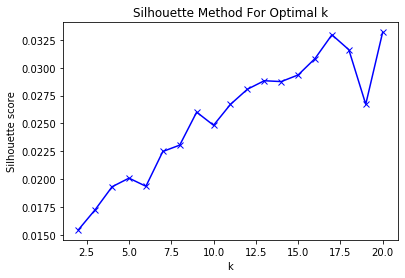

In [85]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 20 ## change this value as necessary

## dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
## increase the number of K from 2 to 20
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(tfidf_matrix)
  labels = kmeans.labels_
  sil.append(silhouette_score(tfidf_matrix, labels, metric = 'euclidean'))
    
K = range(2, kmax+1)
plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method For Optimal k')
plt.show()

So, it seems that _k_ = 17 or 20 seems to create the best cluster. However, you will have different results for every run, because K-means algorithm depends on the random initial seeds. Also, there are a lot of other measures, and they might make a different prediction. To see other measures, please refer to the following documentation: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

### Bottom-up method
Now it is time to practice another clustering algorithm. I will leave this to you. As mentioned in the lecture, K-means clustering is sensitive to noisy data. According to Zipf's law, text distribution is usually very skewed, which means a lot of outliers. Perhaps, K-means algorithm might not be the best algorithm for topic clustering. Agglomerative hierarchical clustering aims at finding the best step at each cluster fusion, and our data might have an intrinsic hierarchy in it. Think about the category of restaurants. It might starts from _Western_ vs. _Eastern_. _Eastern_ might have sub-categories such as _Korean_, _Indian_, _Chineses_, _Japanese_, and so on. If the data has a hierarchy like this, probably hierarchical clustering might be a better choice. Go for it and see whether it really makes any difference. Please see the following link for implementation: https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

### References:
https://scikit-learn.org/stable/modules/clustering.html#k-means<br>
http://brandonrose.org/clustering<br>
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/